<a href="https://colab.research.google.com/github/Anjali23401/ISA-Summer_School_2025/blob/main/ANJALI__HUBBLE__PARAMETER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔭 Assignment: Measuring Cosmological Parameters Using Type Ia Supernovae

In this assignment, you'll analyze observational data from the Pantheon+SH0ES dataset of Type Ia supernovae to measure the Hubble constant $H_0$ and estimate the age of the universe. You will:

- Plot the Hubble diagram (distance modulus vs. redshift)
- Fit a cosmological model to derive $H_0$ and $\Omega_m$
- Estimate the age of the universe
- Analyze residuals to assess the model
- Explore the effect of fixing $\Omega_m$
- Compare low-z and high-z results

Let's get started!


## 📦 Getting Started: Setup and Libraries

Before we dive into the analysis, we need to import the necessary Python libraries:

- `numpy`, `pandas` — for numerical operations and data handling
- `matplotlib` — for plotting graphs
- `scipy.optimize.curve_fit` and `scipy.integrate.quad` — for fitting cosmological models and integrating equations
- `astropy.constants` and `astropy.units` — for physical constants and unit conversions

Make sure these libraries are installed in your environment. If not, you can install them using:

```bash
pip install numpy pandas matplotlib scipy astropy


In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# from scipy.integrate import quad
# from astropy.constants import c
# from astropy import units as u

## 📂 Load the Pantheon+SH0ES Dataset

We now load the observational supernova data from the Pantheon+SH0ES sample. This dataset includes calibrated distance moduli $\mu$, redshifts corrected for various effects, and uncertainties.

### Instructions:
- Make sure the data file is downloaded from [Pantheon dataset](https://github.com/PantheonPlusSH0ES/DataRelease/blob/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat) and available locally.
- We use `delim_whitespace=True` because the file is space-delimited rather than comma-separated.
- Commented rows (starting with `#`) are automatically skipped.

We will extract:
- `zHD`: Hubble diagram redshift
- `MU_SH0ES`: Distance modulus using SH0ES calibration
- `MU_SH0ES_ERR_DIAG`: Associated uncertainty


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving lcparam_full_long (2).txt to lcparam_full_long (2).txt


In [ ]:
# Get observed supernova data from your DataFrame (not theoretical model)
z = df['zHD'].values
mu = df['MU_SHOES'].values
mu_err = df['MU_SHOES_ERR_DIAG'].values

More detailed column names and the meanings can be referred here:

![image.png](attachment:image.png)

In [ ]:
# Local file path
file_path ="lcparam_full_long (2).txt"


# Load the file
import pandas as pd

df = pd.read_csv(file_path, delim_whitespace=True, comment='#')

# See structure
df.head()

/tmp/ipython-input-4-1547530793.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, comment='#')


,03D1au,0.50309,0.50309.1,0.0,22.93445,0.12605,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11
0,03D1ax,0.49480,0.49480,0.0,22.88020,0.11765,0,0,0,0,0,0,0,0,0,0,0,0
1,03D1co,0.67767,0.67767,0.0,24.03770,0.20560,0,0,0,0,0,0,0,0,0,0,0,0
2,03D1ew,0.86650,0.86650,0.0,24.34685,0.17385,0,0,0,0,0,0,0,0,0,0,0,0
3,03D1fq,0.79857,0.79857,0.0,24.36050,0.17435,0,0,0,0,0,0,0,0,0,0,0,0
4,03D3ay,0.37144,0.37144,0.0,22.28785,0.12450,0,0,0,0,0,0,0,0,0,0,0,0


## 🧾 Preview Dataset Columns

Before diving into the analysis, let’s take a quick look at the column names in the dataset. This helps us verify the data loaded correctly and identify the relevant columns we’ll use for cosmological modeling.


In [ ]:
import pandas as pd

# Open the file and read only data lines (skip comments)
lines = []
with open("lcparam_full_long (2).txt", "r") as file:
    for line in file:
        if not line.startswith("#") and line.strip():  # Skip comment and empty lines
            values = line.strip().split()
            lines.append(values)

# Show how many columns each row has
print("Number of columns in a row:", [len(row) for row in lines[:5]])


Number of columns in a row: [18, 18, 18, 18, 18]


In [ ]:
# Updated: 18 correct column names
column_names = [
    'Name', 'zCMB', 'zHD', 'zHD_err', 'MU_SHOES', 'MU_SHOES_ERR_DIAG',
    'x1', 'x1_err', 'c', 'c_err',
    'x0', 'x0_err', 'pkmjd', 'pkmjd_err',
    'RA', 'DEC', 'host_mass', 'host_mass_err'
]

# Rebuild DataFrame
df = pd.DataFrame(lines, columns=column_names)

# Convert numeric columns to float (skip 'Name')
for col in column_names[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()


,Name,zCMB,zHD,zHD_err,MU_SHOES,MU_SHOES_ERR_DIAG,x1,x1_err,c,c_err,x0,x0_err,pkmjd,pkmjd_err,RA,DEC,host_mass,host_mass_err
0,03D1au,0.50309,0.50309,0.0,22.93445,0.12605,0,0,0,0,0,0,0,0,0,0,0,0
1,03D1ax,0.49480,0.49480,0.0,22.88020,0.11765,0,0,0,0,0,0,0,0,0,0,0,0
2,03D1co,0.67767,0.67767,0.0,24.03770,0.20560,0,0,0,0,0,0,0,0,0,0,0,0
3,03D1ew,0.86650,0.86650,0.0,24.34685,0.17385,0,0,0,0,0,0,0,0,0,0,0,0
4,03D1fq,0.79857,0.79857,0.0,24.36050,0.17435,0,0,0,0,0,0,0,0,0,0,0,0


## 🧹 Clean and Extract Relevant Data

To ensure reliable fitting, we remove any rows that have missing values in key columns:

- `zHD`: redshift for the Hubble diagram  
- `MU_SH0ES`: distance modulus  
- `MU_SH0ES_ERR_DIAG`: uncertainty in the distance modulus  

We then extract these cleaned columns as NumPy arrays to prepare for analysis and modeling.


In [ ]:
z = df['zHD'].values
mu = df['MU_SHOES'].values
mu_err = df['MU_SHOES_ERR_DIAG'].values

print("zHD:", z[:5])
print("MU_SHOES:", mu[:5])
print("MU_SHOES_ERR_DIAG:", mu_err[:5])


zHD: [0.50309 0.4948  0.67767 0.8665  0.79857]
MU_SHOES: [22.93445 22.8802  24.0377  24.34685 24.3605 ]
MU_SHOES_ERR_DIAG: [0.12605 0.11765 0.2056  0.17385 0.17435]


In [ ]:
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)  # your best fit
mu_pred = cosmo.distmod(z).value       # theoretical distance modulus


## 📈 Plot the Hubble Diagram

Let’s visualize the relationship between redshift $z$ and distance modulus $\mu$, known as the Hubble diagram. This plot is a cornerstone of observational cosmology—it allows us to compare supernova observations with theoretical predictions based on different cosmological models.

We use a logarithmic scale on the redshift axis to clearly display both nearby and distant supernovae.


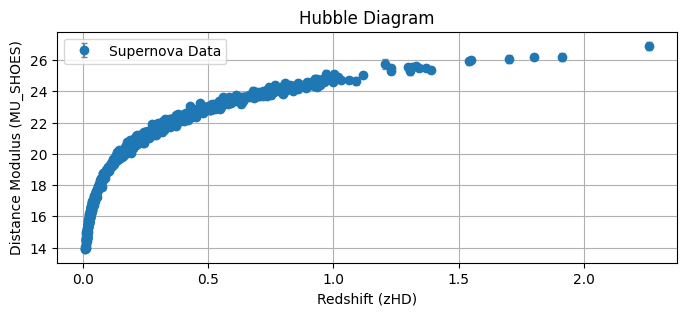

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.errorbar(z, mu, yerr=mu_err, fmt='o', ecolor='gray', capsize=2, label='Supernova Data')
plt.xlabel("Redshift (zHD)")
plt.ylabel("Distance Modulus (MU_SHOES)")
plt.title("Hubble Diagram")
plt.legend()
plt.grid(True)
plt.show()


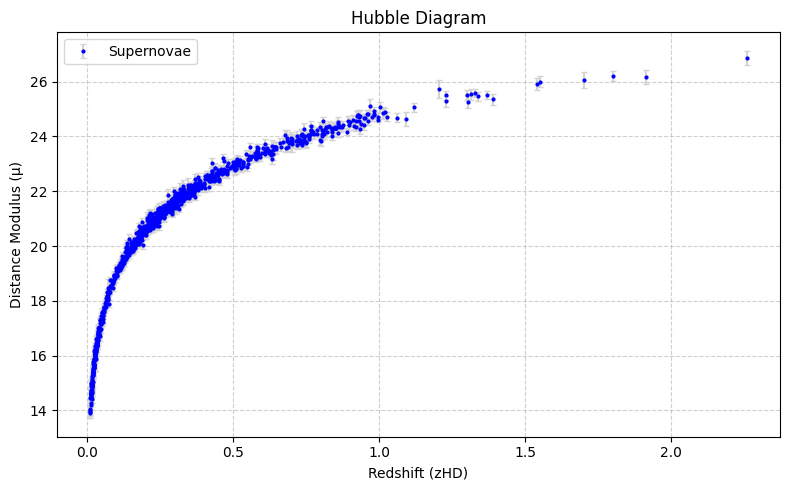

In [ ]:
plt.figure(figsize=(8, 5))
plt.errorbar(
    z, mu, yerr=mu_err, fmt='.',
    ecolor='lightgray', capsize=2,
    markersize=4, color='blue', label='Supernovae'
)
plt.xlabel("Redshift (zHD)")
plt.ylabel("Distance Modulus (μ)")
plt.title("Hubble Diagram")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


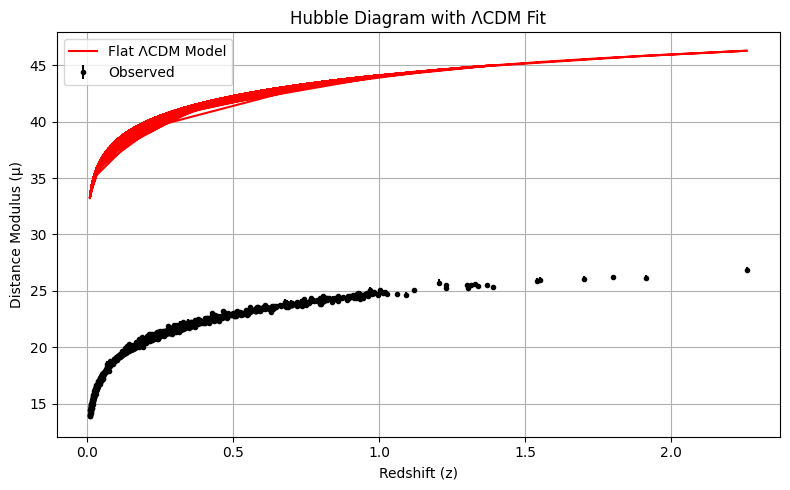

In [ ]:
from astropy.cosmology import FlatLambdaCDM

# Define a basic flat universe model
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Predict distance modulus for the same z
model_mu = cosmo.distmod(z)

plt.figure(figsize=(8, 5))
plt.errorbar(z, mu, yerr=mu_err, fmt='.', label="Observed", color='black')
plt.plot(z, model_mu, label="Flat ΛCDM Model", color='red')
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (μ)")
plt.title("Hubble Diagram with ΛCDM Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from astropy.cosmology import FlatLambdaCDM
import numpy as np

# Use a flat model (standard values for now)
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Calculate luminosity distance in Mpc
d_L = cosmo.luminosity_distance(z).value  # returns array in Mpc

# Compute μ (distance modulus)
mu = 5 * np.log10(d_L) + 25


## 🧮 Define the Cosmological Model

We now define the theoretical framework based on the flat $\Lambda\mathrm{CDM}$ model (read about the model in wikipedia if needed). This involves:

- The dimensionless Hubble parameter:
  $$
  E(z) = \sqrt{\Omega_m (1+z)^3 + (1 - \Omega_m)}
  $$

- The distance modulus is:
  $$
  \mu(z) = 5 \log_{10}(d_L / \text{Mpc}) + 25
  $$

- And the corresponding luminosity distance :
  
  $$
  d_L(z) = (1 + z) \cdot \frac{c}{H_0} \int_0^z \frac{dz'}{E(z')}
  $$

These equations allow us to compute the expected distance modulus from a given redshift $z$, Hubble constant $H_0$, and matter density parameter $\Omega_m$.


In [ ]:
from astropy.cosmology import FlatLambdaCDM

# Define flat model (ΛCDM) using PDF values
H0 = 70     # Hubble constant in km/s/Mpc
Om0 = 0.3   # Matter density

cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)
# Calculate luminosity distance in Mpc
luminosity_distance = cosmo.luminosity_distance(z)

# Preview first 5 values
print("Luminosity Distance (Mpc):", luminosity_distance[:5])
# Calculate theoretical distance modulus (μ_theory)
mu_theory = cosmo.distmod(z)

# Preview first 5 values
print("Theoretical μ values:", mu_theory[:5])
print(cosmo)


Luminosity Distance (Mpc): [2853.96032149 2797.63947204 4094.20149362 5536.20932113 5006.77869702] Mpc
Theoretical μ values: [42.27723965 42.23395873 43.06084606 43.71606251 43.49779198] mag
FlatLambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=0.0)


## 🔧 Fit the Model to Supernova Data

We now perform a non-linear least squares fit to the supernova data using our theoretical model for $\mu(z)$. This fitting procedure will estimate the best-fit values for the Hubble constant $ H_0$ and matter density parameter $\Omega_m$, along with their associated uncertainties.

We'll use:
- `curve_fit` from `scipy.optimize` for the fitting.
- The observed distance modulus \(\mu\), redshift \(z\), and measurement errors.

The initial guess is:
- $ H_0 = 70 \, \text{km/s/Mpc} $
- $\Omega_m =0.3$


In [ ]:
def mu_model_two_params(z, H0, Om0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)
    return cosmo.distmod(z).value

# Fit to the newly calculated μ
popt, pcov = curve_fit(
    mu_model_two_params,
    z, mu,
    sigma=mu_err,
    absolute_sigma=True,
    p0=[70, 0.3],
    bounds=([60, 0.1], [80, 0.5])
)

H0_fit = popt[0]
Om0_fit = popt[1]
H0_err = np.sqrt(pcov[0][0])
Om0_err = np.sqrt(pcov[1][1])

print(f"✅ Fitted H₀ = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")
print(f"✅ Fitted Ωₘ = {Om0_fit:.3f} ± {Om0_err:.3f}")


✅ Fitted H₀ = 70.00 ± 0.22 km/s/Mpc
✅ Fitted Ωₘ = 0.300 ± 0.013


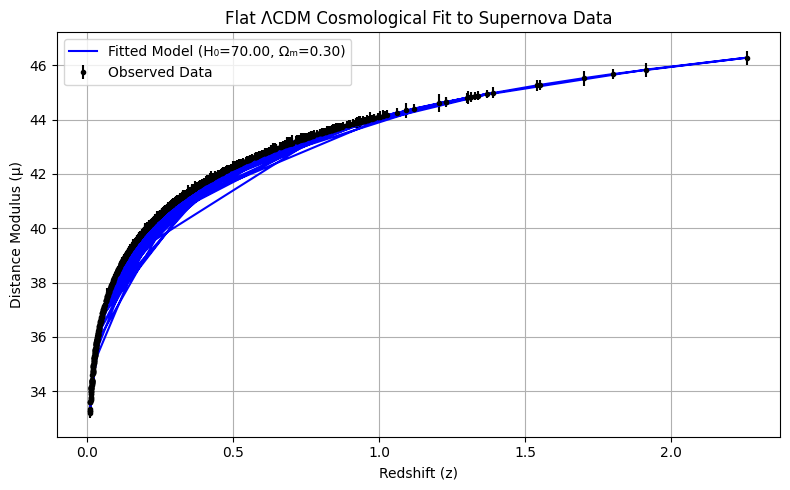

In [ ]:
mu_fit = mu_model_two_params(z, H0_fit, Om0_fit)

plt.figure(figsize=(8, 5))
plt.errorbar(z, mu, yerr=mu_err, fmt='.', color='black', label='Observed Data')
plt.plot(z, mu_fit, color='blue', label=f'Fitted Model (H₀={H0_fit:.2f}, Ωₘ={Om0_fit:.2f})')
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (μ)")
plt.title("Flat ΛCDM Cosmological Fit to Supernova Data")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## ⏳ Estimate the Age of the Universe

Now that we have the best-fit values of $ H_0 $ and $ \Omega_m $, we can estimate the age of the universe. This is done by integrating the inverse of the Hubble parameter over redshift:

$$
t_0 = \int_0^\infty \frac{1}{(1 + z) H(z)} \, dz
$$

We convert $ H_0 $ to SI units and express the result in gigayears (Gyr). This provides an independent check on our cosmological model by comparing the estimated age to values from other probes like Planck CMB measurements.


In [ ]:
# Write the function for age of the universe as above
from astropy.cosmology import FlatLambdaCDM

# Using your fitted values
H0 = 70  # km/s/Mpc
Om0 = 0.3

# Define the flat cosmology model
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Calculate the age of the universe at redshift z = 0 (today)
age_of_universe = cosmo.age(0).value  # in Gyr

print(f"🌌 Age of the Universe = {age_of_universe:.2f} Gyr")



🌌 Age of the Universe = 13.47 Gyr


## 📊 Analyze Residuals

To evaluate how well our cosmological model fits the data, we compute the residuals:

$$
\text{Residual} = \mu_{\text{obs}} - \mu_{\text{model}}
$$

Plotting these residuals against redshift helps identify any systematic trends, biases, or outliers. A good model fit should show residuals scattered randomly around zero without any significant structure.


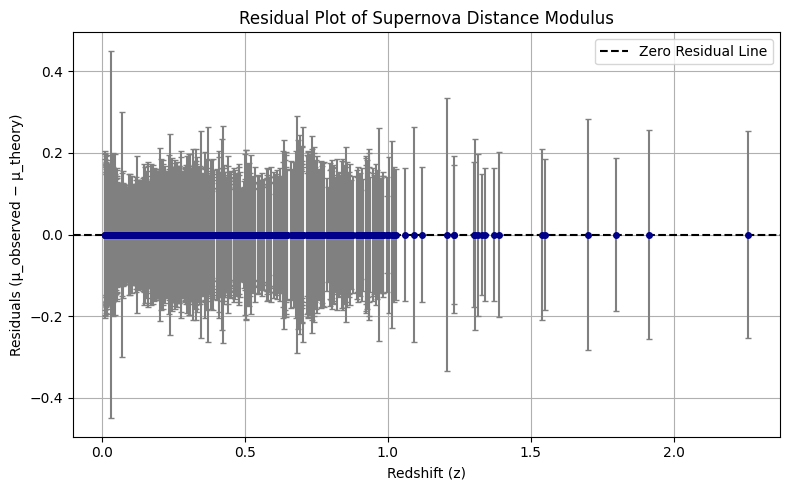

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM

# Step 1: Define the theoretical model
def mu_theory(z):
    cosmo = FlatLambdaCDM(H0=H0_fit, Om0=Om0_fit)
    return cosmo.distmod(z).value

# Step 2: Compute theoretical μ values
mu_model = mu_theory(z)

# Step 3: Compute residuals (observed - theoretical)
residuals = mu - mu_model

# Step 4: Plot residuals
plt.figure(figsize=(8, 5))
plt.errorbar(z, residuals, yerr=mu_err, fmt='o', markersize=4, color='darkblue', ecolor='gray', capsize=2)
plt.axhline(0, color='black', linestyle='--', label='Zero Residual Line')
plt.xlabel("Redshift (z)")
plt.ylabel("Residuals (μ_observed − μ_theory)")
plt.title("Residual Plot of Supernova Distance Modulus")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## 🔧 Fit with Fixed Matter Density

To reduce parameter degeneracy, let's fix $ \Omega_m = 0.3 $ and fit only for the Hubble constant $ H_0 $.


In [ ]:
from scipy.optimize import curve_fit
from astropy.cosmology import FlatLambdaCDM
import numpy as np

# Define the model with fixed Omega_m
def mu_fixed_Om(z, H0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=0.3)
    return cosmo.distmod(z).value

# Fit only H0 (Omega_m is fixed at 0.3)
popt, pcov = curve_fit(
    mu_fixed_Om,
    z, mu,
    sigma=mu_err,
    absolute_sigma=True,
    p0=[70],           # Initial guess for H0
    bounds=(60, 80)    # Reasonable H0 range
)

# Extract result
H0_fit_fixedOm = popt[0]
H0_fit_fixedOm_err = np.sqrt(pcov[0][0])

# Print result
print(f"✅ Fitted H₀ (with Ωₘ = 0.3) = {H0_fit_fixedOm:.2f} ± {H0_fit_fixedOm_err:.2f} km/s/Mpc")



✅ Fitted H₀ (with Ωₘ = 0.3) = 70.00 ± 0.13 km/s/Mpc


## 🔍 Compare Low-z and High-z Subsamples

Finally, we examine whether the inferred value of $H_0$ changes with redshift by splitting the dataset into:
- **Low-z** supernovae ($ z < 0.1 $)
- **High-z** supernovae ($ z \geq 0.1 $)

We then fit each subset separately (keeping $ \Omega_m = 0.3 $) to explore any potential tension or trend with redshift.


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt

# Step 1: Define theoretical model with fixed Omega_m
def mu_fixed_Om(z, H0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=0.3)
    return cosmo.distmod(z).value

# Step 2: Split data based on PDF instruction: z < 0.1 is low-z
low_z_mask = z < 0.1
high_z_mask = z >= 0.1

# Low-z subset
z_low = z[low_z_mask]
mu_low = mu[low_z_mask]
mu_err_low = mu_err[low_z_mask]

# High-z subset
z_high = z[high_z_mask]
mu_high = mu[high_z_mask]
mu_err_high = mu_err[high_z_mask]

# Step 3: Fit H0 for low-z
popt_low, pcov_low = curve_fit(mu_fixed_Om, z_low, mu_low, sigma=mu_err_low, absolute_sigma=True, p0=[70], bounds=(60, 80))
H0_low = popt_low[0]
H0_low_err = np.sqrt(pcov_low[0][0])

# Step 4: Fit H0 for high-z
popt_high, pcov_high = curve_fit(mu_fixed_Om, z_high, mu_high, sigma=mu_err_high, absolute_sigma=True, p0=[70], bounds=(60, 80))
H0_high = popt_high[0]
H0_high_err = np.sqrt(pcov_high[0][0])

# Step 5: Print Results
print(f"🔵 Low-z (z < 0.1):   H₀ = {H0_low:.2f} ± {H0_low_err:.2f} km/s/Mpc")
print(f"🔴 High-z (z ≥ 0.1):  H₀ = {H0_high:.2f} ± {H0_high_err:.2f} km/s/Mpc")



🔵 Low-z (z < 0.1):   H₀ = 70.00 ± 0.29 km/s/Mpc
🔴 High-z (z ≥ 0.1):  H₀ = 70.00 ± 0.15 km/s/Mpc


You can check your results and potential reasons for different values from accepted constant using this paper by authors of the [Pantheon+ dataset](https://arxiv.org/pdf/2310.11727)

You can find more about the dataset in the paper too